# 第三章 泰坦尼克号生存预测（上）

## 1.1 机器学习建模流程回顾
业务理解 -> 获取数据 -> 数据清洗 -> 数据分析 -> 特征工程 -> 建立模型 -> 交叉验证 -> 上线部署

## 1.2 业务理解
### 案例背景
泰坦尼克号沉船事故是世界上最著名的沉船事故之一。1912年4月15日，在她的处女航期间，泰坦尼克号撞上冰山后沉没，造成2224名乘客和机组人员中超过1502人的死亡。这一轰动的悲剧震惊了国际社会，并导致更好的船舶安全法规。 事故中导致死亡的一个原因是许多船员和乘客没有足够的救生艇。然而在被获救群体中也有一些比较幸运的因素；一些人群在事故中被救的几率高于其他人，比如妇女、儿童和上层阶级。 这个Case里，我们需要分析和判断出什么样的人更容易获救。最重要的是，要利用机器学习来预测出在这场灾难中哪些人会最终获救；
<img src="./material/泰坦尼克news.jpg" width="500" height="500">

#### 从上面的描述中，我们可以获得如下信息：
* 问题分类：目的是通过机器学习来预测哪些人会获救；因为对于一条样本，也就是一名乘客来说只有获救和死亡两种结果，因此这是一个二分类的机器学习预测问题；
* 输入输出：[乘客信息] -> [生存还是死亡]

## 1.3 获取数据
### 数据集
Titanic 生存模型预测，其中包含了两组数据：train.csv 和 test.csv，分别为训练集合和测试集合,已经放在material文件夹里。
一般我们拿训练集来训练模型，当模型训练好之后我们再用测试集数据来检测模型效果。

In [1]:
import re  # 加载正则表达式库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 一个强大的作图第三方库，更强大、更简洁、更美观

import warnings
warnings.filterwarnings('ignore')  # 忽略警告

### 数据特征
| 字段 | 字段说明 |
| ------ | ------ |
| PassengerId | 乘客编号 |
|Survived	|存活情况（存活：1 ; 死亡：0）|
|Pclass	|客舱等级|
|Name	|乘客姓名|
|Sex	|性别|
|Age	|年龄|
|SibSp	|同乘的兄弟姐妹/配偶数|
|Parch	|同乘的父母/小孩数|
|Ticket	|船票编号|
|Fare	|船票价格|
|Cabin	|客舱号|
|Embarked|登船港口|

In [49]:
train_data = pd.read_csv('./material/titanic_train.csv')  # pd.read_csv读取csv文件为DataFrame
test_data = pd.read_csv('./material/titanic_test.csv')
pd.read_sql

train_data.head()  # 观察前5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print(train_data.info())  # 使用info函数，数据信息总览
print("-" * 40)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non

从上面的数据描述中可以看出，Age、Cabin、Embarked、Fare几个特征存在缺失值。
再来看下存活的比例如何：

0    549
1    342
Name: Survived, dtype: int64


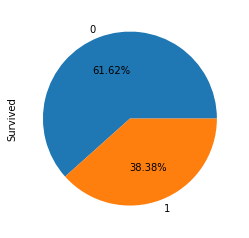

In [5]:
survived_value_counts = train_data['Survived'].value_counts()  # value_counts 方法统计每个数字出现的次数
print(survived_value_counts)

plt.figure()
survived_value_counts.plot.pie(autopct = '%.2f%%')
plt.show()

#autopct，圆里面的文本格式，%.2f%%表示保留两位小数

## 1.4 数据清洗

### 缺失值处理
对于数据进行分析的时候要注意是否有缺失值。有些机器学习算法能够自动处理缺失值，如基于树的模型和神经网络，一些则不能，处理缺失值一般有以下方法：
* 如果数据集很多，但有很少的缺失值，可以删掉带缺失值的行；
* 数据特征数据缺失占比很大，也就也没有太大的分析意义，可以直接删除此特征数据；
* 大多数情况下，可以对缺失值赋均值或者众数。
* 有时看情况也可以赋一个代表缺失的值，比如‘U0’。因为缺失本身也可能代表着一些隐含信息。比如船舱号Cabin这一属性，缺失可能代表并没有船舱。
* 或者使用其他的特征来对缺失值进行简单预测，填补缺失。

比如在哪上船Embarked这个属性，缺失值有两个，上船地点只有三个，我们直接使用众数填补就好了。

而船舱Cabin这个属性，缺失值达到了80%，我采取直接删除的处理方式。

In [6]:
em_mode = train_data['Embarked'].mode()[0]  # 首先获取众数
train_data['Embarked'].fillna(em_mode, inplace=True)  # 进行填充
train_data.info()
train_data.drop(['Cabin'], inplace=True, axis=1)  # 直接删除Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age缺失了近两成数据，我们可以采取用其他特征来对Age进行建模预测的方式，来对Age缺失值进行填补。

In [7]:
from sklearn.ensemble import RandomForestRegressor  # 使用随机深林模型

#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass']]  # 选择Age预测所需的特征数据，自己觉得和Age有关的
age_df_notnull = age_df.loc[(train_data['Age'].notnull())]  # Age未缺失的作为训练集训练模型
age_df_isnull = age_df.loc[(train_data['Age'].isnull())]  # Age缺失的作为预测集，来预测Age
X = age_df_notnull.values[:,1:]  # 其他数据作为输入特征X
Y = age_df_notnull.values[:,0]  # Age作为标签y
# print(X)
# print(Y)
print(min(train_data['Age']))

0.42


In [8]:
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000)  # 新建随机深林模型，n_estimators选择1000课树，
RFR.fit(X,Y)  # 进行训练
predictAges = RFR.predict(age_df_isnull.values[:,1:])  # 对缺失的部分进行预测
print(predictAges)

[23.99142956 33.47563918 18.55810833 35.07246347 22.898475   27.91292251
 37.05719048 22.12360224 16.85028333 27.91292251 31.75979324 33.7999
 22.12360224 23.56612857 41.08650079 39.03361468 15.09661143 27.91292251
 31.75979324 23.88769048 31.75979324 31.75979324 27.91292251 22.83958953
 30.7257404  31.75979324 40.34533808 15.22960094 31.61096667 30.74981993
 25.53852318 11.06063533 25.5458     58.55736883  7.63787826 11.06063533
 32.44356461 58.08408333 26.65992857 40.34533808 22.12360224 11.06063533
 34.51712012 27.91292251  7.63787826 35.5788619  22.86285694 26.65992857
 30.74981993 34.18728333 40.34533808 40.34533808 53.179      22.12360224
 35.6319619  58.99740216 39.03361468 37.10112413 22.12360224 26.25071418
 31.98902231 31.75979324 28.96011667 11.06063533 26.25071418 32.37152619
 27.91292251 26.57740714 61.51686667 35.07246347 22.898475   22.898475
 33.7999     16.85028333 22.12360224 35.02730714 27.91292251 24.78327164
  7.63787826 27.91292251 21.41952305 35.6319619  31.75979

In [9]:
train_data.loc[train_data['Age'].isnull(), ['Age']] = predictAges  # 对缺失的数据列进行填补
train_data['Age'] = train_data['Age'].astype(int)
train_data.info()
print(min(train_data['Age']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB
0


## 1.5 数据关系分析
当处理完缺失值之后，我们经常会做就是去分析变量与变量之间，变量与因变量之间的关系。为下一步更好的进行特征工程做准备。

### 1. 性别与是否生存的关系Sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


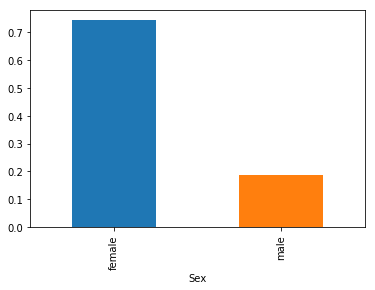

In [10]:
sex_survived = train_data.groupby(['Sex'])['Survived'].mean()
print(sex_survived)
plt.figure()
sex_survived.plot.bar()
plt.show()

可以看出，泰坦尼克号的生存事故中，确实体现了女士优先的绅士精神；女性的存活率远高于男性。对我们的建模来说，性别是一个重要的特征。

### 2. 船舱等级与生存的关系Pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


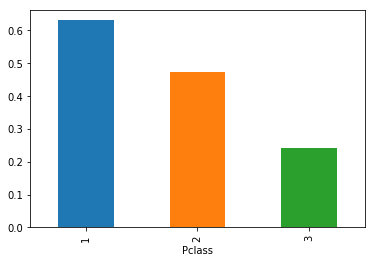

In [11]:
pclass_survived = train_data.groupby(['Pclass'])['Survived'].mean()
print(pclass_survived)
plt.figure()
pclass_survived.plot.bar()
plt.show()

头等舱的生存率还是明显高于后面的仓位的，钱的力量还是很强的。

### 1.3 年龄与存活与否的关系Age

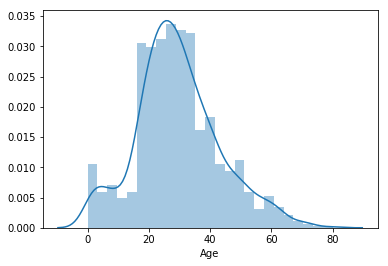

In [12]:
# 先来看下整体的年龄分布
plt.figure()
sns.distplot(train_data['Age'])  # 直方图
plt.show()

乘客年龄整体呈正态分布，18-50岁的乘客占大多数。

Age
0     1.000000
1     0.714286
2     0.300000
3     0.833333
4     0.700000
5     1.000000
6     0.666667
7     0.250000
8     0.500000
9     0.250000
10    0.000000
11    0.090909
12    1.000000
13    1.000000
14    0.428571
15    0.875000
16    0.421053
17    0.461538
18    0.400000
19    0.360000
20    0.235294
21    0.192308
22    0.547619
23    0.285714
24    0.375000
25    0.285714
26    0.419355
27    0.333333
28    0.275862
29    0.400000
        ...   
41    0.555556
42    0.533333
43    0.333333
44    0.333333
45    0.333333
46    0.000000
47    0.111111
48    0.666667
49    0.666667
50    0.500000
51    0.285714
52    0.500000
53    0.333333
54    0.375000
55    0.333333
56    0.500000
57    0.000000
58    0.333333
59    0.000000
60    0.500000
61    0.000000
62    0.500000
63    1.000000
64    0.000000
65    0.000000
66    0.000000
70    0.000000
71    0.000000
74    0.000000
80    1.000000
Name: Survived, Length: 71, dtype: float64


<function matplotlib.pyplot.show(*args, **kw)>

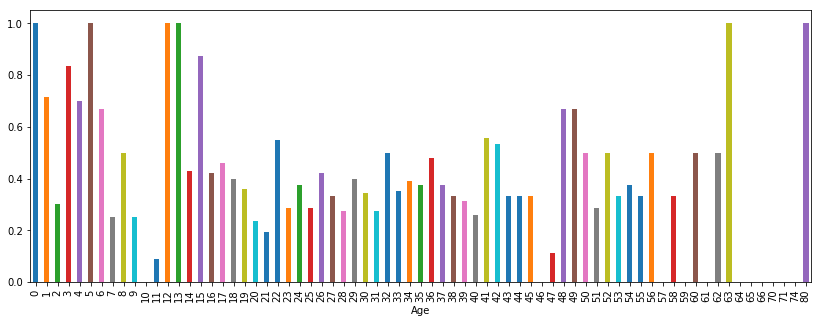

In [13]:
# 用条形图图来看下不同年龄的生存概率
age_survived = train_data.groupby(['Age'])['Survived'].mean()
print(age_survived)
plt.figure(figsize=(14, 5))
age_survived.plot.bar()
plt.show

我们看到，小孩子和老人的存活率好像比年轻力壮的年轻人还要高，但这是真的吗；我们前面直方图看到，有些年龄人很少，比如80岁的人只有一个还恰巧生存，样本太少这个存活率就没意义。那我们应该如何分析呢？

样本共有891个，我们可以年龄将乘客划分为儿童、少年、成年、壮年、老年五个群体，再分别进行分析。

Age_group
(-1, 12]     0.506173
(12, 18]     0.481013
(18, 40]     0.355009
(40, 65]     0.389610
(65, 100]    0.125000
Name: Survived, dtype: float64


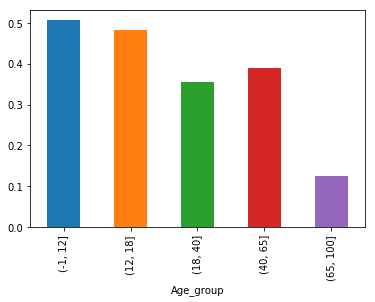

In [14]:
bins = [-1, 12, 18, 40, 65,100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)  # 使用cut函数对年龄进行分组
age_survived = train_data.groupby(['Age_group'])['Survived'].mean()
print(age_survived)
plt.figure()
age_survived.plot.bar()
plt.show()

如图，这个结果还是蛮出乎意料，生命力更弱小的婴儿和孩子反而是生存概率更大的群体，可以想象，大人们愿意将未来留给孩子。

### 4 名称与存活的关系 Name
这里你一定会疑惑，一个人叫什么会和生存与否有关吗？如果是单纯的人名的话当然不会有关系，但我们先看下这份名单的Name：

<img src="./material/name 称呼.png">

我们发现每个人的name也都包含了称位头衔的信息，如Master、Mr、Mrs、Doctor，我们可以猜想，一个人的地位应该和生存与否是否会有关系呢？

In [15]:
# 利用正则表达式获取头衔信息
train_data['Title'] = train_data['Name'].map(lambda x: re.search("([A-Za-z]+)\.", x).group()[:-1])
train_data['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

Title
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64


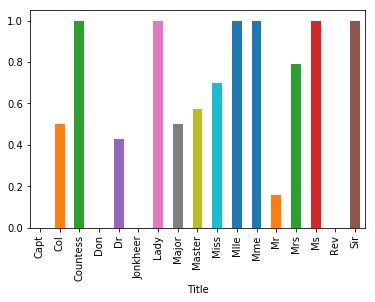

In [16]:
# 接下来就可以看头衔信息与生存的关系了
title_survived = train_data.groupby(['Title'])['Survived'].mean()
print(title_survived)
plt.figure()
title_survived.plot.bar()
plt.show()

如图看出，成为也对生存概率有所影响，但也存在某类样本过少的问题。

### 5 有无兄弟姐妹和存活的关系 SibSp

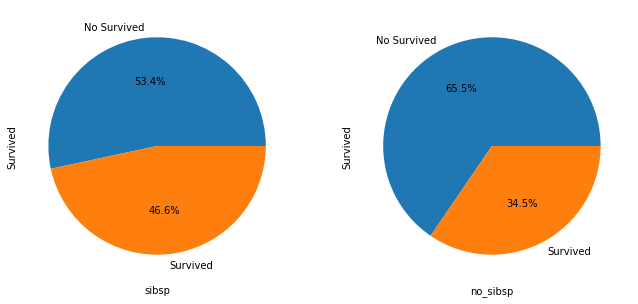

In [17]:
#将数据分为有兄弟姐妹和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(11,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('sibsp')
 
plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived','Survived'],autopct= '%1.1f%%')
plt.xlabel('no_sibsp')
 
plt.show()

有兄妹的会比没有的存活率更高一些

### 6 有无父母子女和存活的关系 Parch

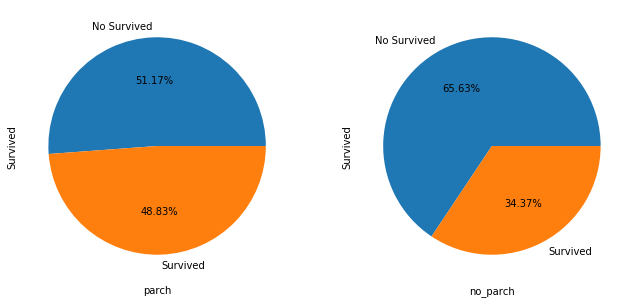

In [18]:
# 和兄弟姐妹一样的分析思路
parch_df = train_data[train_data['Parch'] != 0]  
no_parch_df = train_data[train_data['Parch'] == 0]  
 
plt.figure(figsize=(11,5))  
plt.subplot(121)  
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct= '%1.2f%%')  
plt.xlabel('parch')  
 
plt.subplot(122)  
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.2f%%')  
plt.xlabel('no_parch') 
 
plt.show()  

同样，有亲人陪同的生存概率会更大一些。

### 7 亲友的人数与存活的关系 SibSp&Parch

<Figure size 432x288 with 0 Axes>

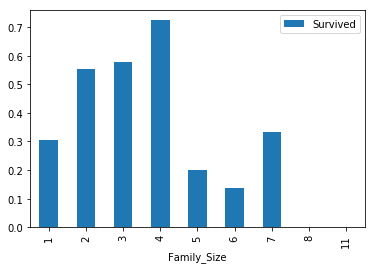

In [19]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp']+1  # 计算家庭成员
plt.figure()
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()
plt.show()

从图表中可以看出，若独自一人，那么其存活率比较低；但是如果亲友太多的话，存活率也会很低。

### 8 票价分布与存活的关系 Fare

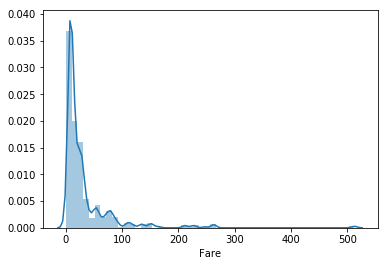

In [20]:
# 先来看下票价的分布情况
plt.figure()
sns.distplot(train_data['Fare'])
plt.show()

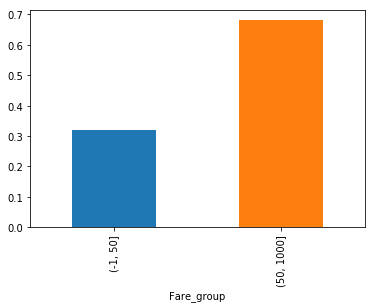

In [21]:
# 简单将票价分为低价和高价票看下，以50作为分割点
train_data['Fare_group'] = pd.cut(train_data['Fare'], [-1, 50, 1000])
fare_survive = train_data.groupby(['Fare_group'])['Survived'].mean()
plt.figure()
fare_survive.plot.bar()
plt.show()

由上图表可知，票价与是否生还有一定的相关性，生还者的平均票价要大于未生还者的平均票价。

### 9 港口和存活与否的关系 Embarked
泰坦尼克号从英国的南安普顿港出发，途径法国瑟堡和爱尔兰昆士敦，那么在昆士敦之前上船的人，有可能在瑟堡或昆士敦下船，这些人将不会遇到海难。

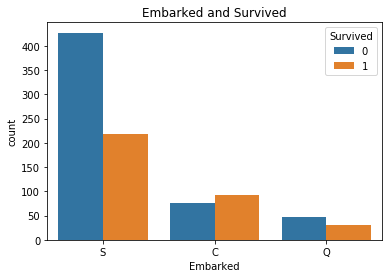

In [22]:
plt.figure()
sns.countplot('Embarked',hue='Survived',data=train_data)
plt.title('Embarked and Survived')
plt.show()

由上可以看出，在不同的港口上船，生还率不同，C最高，Q次之，S最低。

### 10 其他与存活有关的特征
对于数据集中没有给出的特征信息，我们还可以联想其他可能会对模型产生影响的特征因素。如：乘客的国籍、乘客的身高、乘客的体重、乘客是否会游泳、乘客职业等等。

从这里你也可以了解到，所谓的机器学习来训练模型，实际可以尽可能发挥想象力，利用你任何想象的到的数据，利用任何和因变量有关的特征，所有的可能性你都可以加进来尝试，最终用模型的结果来证明的的想象；某种程度上来说，这是一份极其自由，极其有趣又富有艺术感的工作呢。

## 1.6 特征工程
通过上面的分析，我相信你已经对数据的大体结构有一定的认识了，也对变量间的关系有所了解，接下就让我们开始特征工程吧。

在进行特征工程的时候，我们不仅需要对训练数据进行处理，还需要同时将测试数据同训练数据一起处理，使得二者具有相同的数据类型和数据分布。

In [23]:
# 重新载入数据，合并数据集
train_df_org = pd.read_csv('./material/titanic_train.csv')
test_df_org = pd.read_csv('./material/titanic_test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)   #891+418=1309rows, 12columns
combined_train_test.shape

(1309, 12)

对数据进行特征工程，也就是从各项参数中提取出对输出结果有或大或小的影响的特征，将这些特征作为训练模型的依据。一般来说，我们会先从含有缺失值的特征开始。

### 1. Embarked

In [24]:
# 与之前相同，用众数来填充缺失
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)
combined_train_test['Embarked'].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

我们看到Embarked是用字母来表示的，电脑无法直接对字母进行训练，需要先将其映射为数字，同时它是类别变量，我们需要对其进行哑变量编码

In [25]:
#为了后面的特征分析，这里我们将Embarked特征进行factorizing，映射为数字
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]
print(combined_train_test['Embarked'].head(7))

0    0
1    1
2    0
3    0
4    0
5    2
6    0
Name: Embarked, dtype: int64


In [26]:
# 使用pd.get_dummies获取one-hot编码哑变量编码；
# 在类别特征中，0、1、2实际并没有大小比较的含义，将其进行哑变量编码，表示类别之一，对机器学习来说，这种描述更加精准
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'],prefix=combined_train_test[['Embarked']].columns[0])
print(emb_dummies_df.head())
combined_train_test = pd.concat([combined_train_test, emb_dummies_df], axis=1)  # 合并

   Embarked_0  Embarked_1  Embarked_2
0           1           0           0
1           0           1           0
2           1           0           0
3           1           0           0
4           1           0           0


### 2. Sex
sex一样需要one-hot编码，也就是dummy处理：

In [27]:
# 为了后面的特征分析，这里我们也将Sex特征进行factorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]
 
sex_dummies_df = pd.get_dummies(combined_train_test['Sex'],prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test,sex_dummies_df],axis=1)

### 3. Name
名称中提取称呼

In [28]:
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(",(.*?)\.").findall(x)[0])
combined_train_test['Title'] = combined_train_test['Title'].apply(lambda x:x.strip())

In [29]:
# 对各式称呼进行格式化，将相同类型的称谓归为同一类
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt','Col','Major','Dr','Rev'],'Officer'))
title_Dict.update(dict.fromkeys(['Don','Sir','the Countess','Dona','Lady'],'Royalty'))
title_Dict.update(dict.fromkeys(['Mme','Ms','Mrs'],'Mrs'))
title_Dict.update(dict.fromkeys(['Male','Miss'],'Miss'))
title_Dict.update(dict.fromkeys(['Mr'],'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'],'Master'))
 
combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)
combined_train_test['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [30]:
# 依旧对称呼进行dummy操作
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]
title_dummies_df = pd.get_dummies(combined_train_test['Title'],prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test,title_dummies_df],axis=1)

### 4. Fare
由前面分析可以知道，Fare项在测试数据中缺少一个值，所以需要对该值进行填充。我们按照一二三等舱各自的均价来填充：

下面transform将函数np.mean应用到各个group中。

In [31]:
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))
# 给票按价格分等级，使用qcut使每个等级的人数相当
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'],5)
combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]
 
fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x: 'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test,fare_bin_dummies_df],axis=1)
combined_train_test.drop(['Fare_bin'],axis=1, inplace=True)

### 5. Pclass
Pclass直接保留不做操作

### 6. Parch and SibSp
由前面的分析，我们可以知道，亲友的数量没有或者太多会影响到Survived。所以将二者合并为FamliySize这一组合项，同时也保留这两项。

In [32]:
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1  # 计算家庭大小

### 7. Age
Age的填充与之前一样，有其他数据训练来对缺失Age做预测

In [33]:
missing_age_df = pd.DataFrame(combined_train_test[
    ['Age', 'Embarked', 'Sex', 'Title', 'Family_Size', 'Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_train.head()

,Age,Embarked,Sex,Title,Family_Size,Fare,Fare_bin_id,Pclass
0,22.0,0,0,0,2,7.2500,0,3
1,38.0,1,1,1,2,71.2833,1,1
2,26.0,0,1,2,1,7.9250,2,3
3,35.0,0,1,1,2,53.1000,1,1
4,35.0,0,0,0,1,8.0500,2,3


In [34]:
from sklearn.ensemble import RandomForestRegressor
X = missing_age_train.values[:,1:]  # 其他数据作为输入特征X
Y = missing_age_train.values[:,0]  # Age作为标签y
# use RandomForestRegression to train data
RFR = RandomForestRegressor(n_estimators=1000)  # 新建随机深林模型，n_estimators选择1000课树，
RFR.fit(X,Y)  # 进行训练
predictAges = RFR.predict(missing_age_test.values[:,1:])  # 对缺失的部分进行预测

combined_train_test.loc[combined_train_test['Age'].isnull(), ['Age']] = predictAges  # 对缺失的数据列进行填补
combined_train_test['Age'] = combined_train_test['Age'].astype(int)
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 32 columns):
Age            1309 non-null int32
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Embarked_0     1309 non-null uint8
Embarked_1     1309 non-null uint8
Embarked_2     1309 non-null uint8
Sex_0          1309 non-null uint8
Sex_1          1309 non-null uint8
Title          1309 non-null int64
Title_-1       1309 non-null uint8
Title_0        1309 non-null uint8
Title_1        1309 non-null uint8
Title_2        1309 non-null uint8
Title_3        1309 non-null uint8
Title_4        1309 non-null uint8
Title_5        1309 non-null uint8
Fare_bin_id    

In [35]:
# 将年龄分组
bins = [-1, 12, 18, 40, 100]
combined_train_test['Age_group'] = pd.cut(combined_train_test['Age'], bins)

### 8. Cabin
因为Cabin项的缺失值确实太多了，我们很难对其进行分析，或者预测。所以这里我们可以直接将Cabin这一项特征去除。但通过上面的分析，可以知道，该特征信息的有无可能也与生存率有一定的关系，所以这里我们暂时保留该特征，只将其分为有和无两类。

In [36]:
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

### 9. 特征间相关性分析
我们挑选一些主要的特征，生成特征之间的关联热图，可以查看特征与特征之间的相关性：

In [37]:
Correlation = pd.DataFrame(combined_train_test[['Embarked','Sex','Title','Family_Size', 'Fare','Fare_bin_id','Pclass','Age','Cabin']])

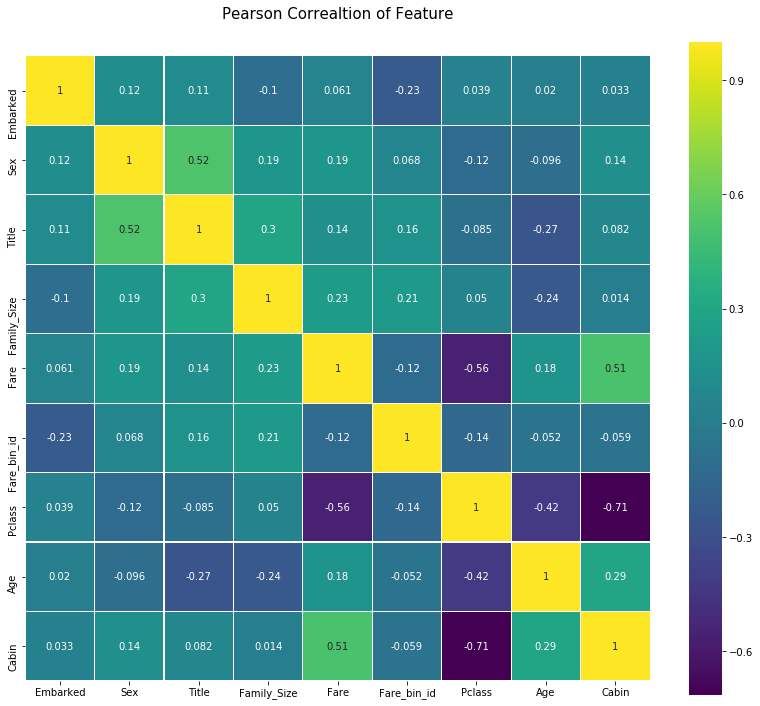

In [38]:
colormap = plt.cm.viridis  # 颜色风格映射
plt.figure(figsize=(14,12))  # 皮尔逊系数
plt.title('Pearson Correaltion of Feature',y=1.05,size=15)
corr = Correlation.astype(float).corr()
sns.heatmap(corr,linewidths=0.1,vmax=1.0,square=True, cmap=colormap,linecolor='white',annot=True)
plt.show()

相关性热图可以清晰看到变量之间的相关性，相关性的值越大，证明两个变量包含的信息越重复，一般我们只会保留一个，这样可以减少模型过拟合的风险。

## 1.7 建立模型
在建立模型之前，我们要先提取需要的特征，剔除不要的特征，将训练数据和测试数据分割开

In [39]:
# 将训练数据和测试数据分割开
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]
# 我们这里测试集的数据没有准备标签，所以不能验证测试集的预测结果，所以还是只能对训练集切分；后面可以尝试把测试集也预测一下，提交到kaggle获取准确度和排名
data = train_data
remove_feature = ['Survived', 'Cabin', 'Name', 'Ticket', 'PassengerId', 'Age_group']
X = data[[feature for feature in data.columns if feature not in remove_feature]]
y = data['Survived']

In [40]:
print(X.shape, '\n')
print(X.info())

(891, 27) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 27 columns):
Age            891 non-null int32
Embarked       891 non-null int64
Fare           891 non-null float64
Parch          891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
SibSp          891 non-null int64
Embarked_0     891 non-null uint8
Embarked_1     891 non-null uint8
Embarked_2     891 non-null uint8
Sex_0          891 non-null uint8
Sex_1          891 non-null uint8
Title          891 non-null int64
Title_-1       891 non-null uint8
Title_0        891 non-null uint8
Title_1        891 non-null uint8
Title_2        891 non-null uint8
Title_3        891 non-null uint8
Title_4        891 non-null uint8
Title_5        891 non-null uint8
Fare_bin_id    891 non-null int64
Fare_0         891 non-null uint8
Fare_1         891 non-null uint8
Fare_2         891 non-null uint8
Fare_3         891 non-null uint8
Fare_4         891 non-null uin

In [41]:
from sklearn.model_selection import train_test_split  # 用于训练集和测试集分割的方法

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('训练集特征shape：',X_train.shape)
print('训练集标签shape：',y_train.shape)
print('测试集特征shape：',X_test.shape)
print('测试集标签shape：',y_test.shape)

训练集特征shape： (623, 27)
训练集标签shape： (623,)
测试集特征shape： (268, 27)
测试集标签shape： (268,)


### 现在我们可以开始建模
直接使用随机森林了，后续可以自己试试逻辑回归和xgboost的效果

In [42]:
from sklearn.ensemble import RandomForestClassifier  # 导入随机森林模型，处理分类问题

# 通过改动输入参数的不同可以手动调参，也有网格调参等很多自动调参的方式
rf_param = {
    'n_estimators': 1000,  # 树的数量
    'max_depth': 8, # 树的最大深度
    'max_features': 20  # 随机森林允许单个决策树使用特征的最大数量。
}

model = RandomForestClassifier(**rf_param)  # 新建随机深林模型，n_estimators选择1000课树，
model.fit(X_train, y_train)  # 进行训练
prediction = model.predict(X_test)  # 对缺失的部分进行预测
result = pd.DataFrame({
    'real': y_test,
    'pre': prediction
})

In [43]:
from sklearn.metrics import roc_auc_score  # 导入计算auc值的函数
auc = roc_auc_score(result['real'], result['pre'])
print('auc：', auc)  # auc值是分类模型中最常用的评价指标，是同时考虑了准确率与召回率的指标，在0~1之间，越接近1证明模型准确率越高
result.head(10)

auc： 0.819404761904762


,real,pre
495,0,0
648,0,0
278,0,0
31,1,1
255,1,0
298,1,0
609,1,1
318,1,1
484,1,1
367,1,1


## 数据特征重要性
基于树的模型的另一个好处，就是可以自动将特征的贡献度输出出来，让我们了解各个特征的重要性。

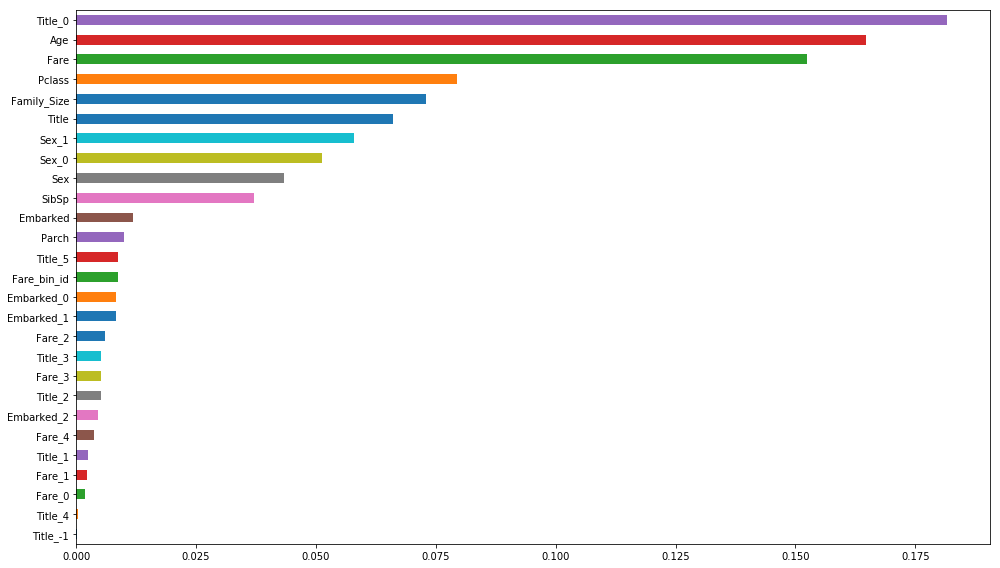

In [44]:
plt.figure(figsize=(14, 8))
importance = model.feature_importances_
s_importance = pd.Series(index=X_train.columns, data=importance)
s_importance = s_importance.sort_values(ascending=True)
s_importance.plot.barh()
plt.tight_layout()
plt.show()

从这上面看出，头衔类别、年龄、船票价格、家庭成员多少，是对模型训练比较重要的特征。

## 1.8 学习曲线（交叉验证）
接下来我们来看下学习曲线，顾名思义，学习曲线就是记录我们模型从无到有，模型训练过程的曲线。从学习曲线中，我们很容易可以看出误差是如何下降的，拟合状态又是如何等模型信息。

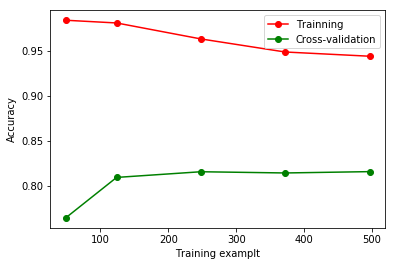

In [45]:
from sklearn.model_selection import learning_curve  # 导入学习曲线，检测学习状态
# 学习曲线其实是交叉验证的过程，每次会随机选择一部分数据作为训练集，剩下为测试集，轮流进行预测训练，减少偶然性，这样得到的结果更加准确可信
train_sizes, train_loss, test_loss = learning_curve(model, X_train, y_train, cv=5, 
                                                    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = np.mean(train_loss, axis=1)
test_loss_mean = np.mean(test_loss, axis=1)
# 学习曲线可视化
plt.plot(train_sizes, train_loss_mean, 'o-', color='r', label="Trainning")
plt.plot(train_sizes, test_loss_mean, 'o-', color='g', label='Cross-validation')
plt.xlabel("Training examplt")
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

如图我们看有两条线，红线代表模型拟合训练集数据的准确率，绿线代表模型在测试集上的表现结果，可以看到两点：
* 绿线的准确随着模型训练样本的增多由逐渐增大，当达到一定程度时就不再增加了；
* 红线的准确率有95%，但在测试集上准确率却只有80%，其实这就是一种过拟合的表现了

## save&load
其实到这里，我们已经算是把一个简单的模型训练好了，那我们如何在实际生产中使用载入我们的模型呢？其实很简单，保存模型，使用时在load就可以了。
我们可以利用joblib模块进行模型的读写。

In [46]:
from sklearn.externals import joblib  # 导入joblib模块
# 保存模型
joblib.dump(model, './first_model.joblib')

['./first_model.joblib']

In [47]:
# load并用模型预测
model_1 = joblib.load('./first_model.joblib')
print(model_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=20, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [48]:
model_1.predict(X_test)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

## 1.10 总结&课后任务
### 总结
<img src="./material/总结.png" width="600px" height="600px">

### 课后任务
* 复习本节课内容。
* 以个人形式，参加一个kaggle或天池的机器学习竞赛项目，新的或以前的项目都可以。
* 下节课内容涉及比较多原理知识，好好预习。